# Intro to data handling, gdb9 database

## MPI FKF study group

First thing in data analysis and machine learning is to have data to work with. Here, we take a set of computational data for organic molecules and have a first look at it. 

The data set is taken from the  publication [Quantum chemistry structures and properties of 134 kilo molecules](https://www.nature.com/articles/sdata201422) and contains molecules made up from the atoms C, H, O, N, F.

The data is preprocessed and compiled in the file *gdb9_features.csv*. Each row corresponds to one molecule with 17 different columns with values for different molecular properties. See [Table 3](https://www.nature.com/articles/sdata201422/tables/4) of the above paper for a description.

The goal of this excercise is to get this data ready for use with python and run some first analyis on it.

If you do not have python installed on your computer you might be able to run the code on [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb). In this case I do not know how to link to the csv file or whether it can be uploaded. That's up to you to check out at the moment.

In [1]:
#copy the line below into a Google Colab cell and see if it works

print("Hello world")

Hello world


The following code reads the csv file into a pandas dataframe. [pandas](https://pandas.pydata.org/) is a data analysis and manipulation tool often used in similar projects. The object that holds the data is called a dataframe. In the following, the particular dataframe we create and use will have the name *df*.

In [4]:
#import pandas library
import pandas as pd


#variable with the labels of the columns, see Table 3 of the publication. 
#This makes the pandas dataframe more readable
header_names=["N/A", "ID", "Rotational constant A", "Rotational constant B", "Rotational constant C", 
              "Dipole moment", "Isotropic polarizability", "Energy of HOMO", "Energy of LUMO", 
             "Gap (E_LUMO−E_HOMO)", "Electronic spatial extent", "Zero point vibrational energy", 
             "Internal energy at 0 K", "Internal energy at 298.15 K", "Enthalpy at 298.15 K", 
             "Free energy at 298.15 K", "Heat capacity at 298.15 K"]

#The following line reads the csv file into the dataframe df and uses the above specified labels in the header
#to label the columns
df = pd.read_csv('gdb9_features.csv', sep = ', ', header=None, names=header_names)

#As it turns out, there is no interesting information in the first two columns, they are merely labels.
#We can remove them from the dataframe usin the drop() function of pandas
df = df.drop(["N/A", "ID"], axis=1)

C:\Users\gutzler\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


To get a feel for how the dataframe and our data looks like, we can call the function **head()** on it.
This returns the first five entries with the corresponding physical and chemical properties of the molecules.

In [5]:
df.head()

,Rotational constant A,Rotational constant B,Rotational constant C,Dipole moment,Isotropic polarizability,Energy of HOMO,Energy of LUMO,Gap (E_LUMO−E_HOMO),Electronic spatial extent,Zero point vibrational energy,Internal energy at 0 K,Internal energy at 298.15 K,Enthalpy at 298.15 K,Free energy at 298.15 K,Heat capacity at 298.15 K
0,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469
1,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,26.1563,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316
2,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,19.0002,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002
3,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,59.5248,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574
4,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,48.7476,0.016601,-93.411888,-93.409370,-93.408425,-93.431246,6.278


Calling **head()** (**tail()** does the same for the last five entries) doesn't tell us anything about the statistics of the data. The function **describe()** helps us out here.

In [6]:
df.describe()

,Rotational constant A,Rotational constant B,Rotational constant C,Dipole moment,Isotropic polarizability,Energy of HOMO,Energy of LUMO,Gap (E_LUMO−E_HOMO),Electronic spatial extent,Zero point vibrational energy,Internal energy at 0 K,Internal energy at 298.15 K,Enthalpy at 298.15 K,Free energy at 298.15 K,Heat capacity at 298.15 K
count,11411.000000,11411.000000,11411.000000,11411.000000,11411.000000,11411.000000,11411.000000,11411.000000,11411.000000,11411.000000,11411.000000,11411.000000,11411.000000,11411.000000,11411.000000
mean,59.608973,1.911841,1.508217,2.637817,64.896942,-0.244884,0.012532,0.257415,954.712289,0.130510,-358.483421,-358.475570,-358.474626,-358.515805,28.308024
std,5802.752654,5.242546,3.611612,1.529295,9.184969,0.026168,0.047674,0.048871,258.426870,0.034100,44.737498,44.736979,44.736979,44.738458,4.761954
min,0.000000,0.357840,0.344070,0.000000,6.310000,-0.428600,-0.175000,0.076600,19.000200,0.015951,-492.026657,-492.019416,-492.018471,-492.058075,6.002000
25%,3.411395,1.293565,1.096760,1.510400,59.605000,-0.258900,-0.023300,0.221100,787.457800,0.106894,-386.142897,-386.132743,-386.131798,-386.178168,25.159500
50%,4.363620,1.695100,1.311940,2.435000,65.510000,-0.246200,0.015900,0.254500,942.993300,0.128855,-362.651403,-362.642959,-362.642015,-362.684462,28.602000
75%,5.931885,2.085300,1.648320,3.620200,71.190000,-0.234000,0.049800,0.294400,1091.340700,0.151902,-327.973896,-327.965573,-327.964629,-328.007079,31.698500
max,619867.683140,437.903860,282.945450,18.691500,96.740000,-0.146000,0.193500,0.622100,2975.378300,0.245257,-40.478930,-40.476062,-40.475117,-40.498597,42.103000


This returns the number of entries in each column in the first row, the mean of the columnin the second row, the standard deviation of the column in the third row, etc.

The min and max values as well as the percentiles come in handy as they tell you something about possible extreme outliers. For example, the first column **Rotational constant A** has a max value of *619868*, which is huge compared to the mean. Not sure if there is an error here, that needs to be checked.


The use of a pandas dataframe allows us to easily plot any one column versus any other, for example the LUMO as a function of the HOMO calling the **plot()** function on the dataframe.

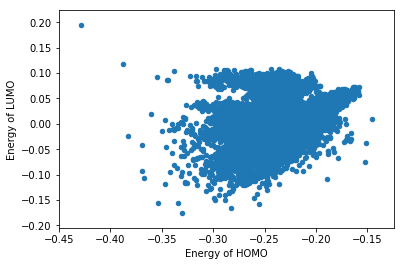

In [8]:
df.plot(kind='scatter',x="Energy of HOMO",y="Energy of LUMO")

In large data sets with lots of entries it might become a bit tedious to plot each graph separately and plotting all columns against all others might already offer first insight into interesting trends in the data set.
This can be done using the **function scatter_matrix()** on the dataframe. I remove the first 3 entries as they are quite boring and because the resulting figure is already very crowded.

The scatter matrix plots one row versus another in a matrix, the diagonal is a histogram (density distribution) of the values in each column. If you drop more lines from the matrix, the results will become clearer. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF73D44B00>,
      dtype=object)

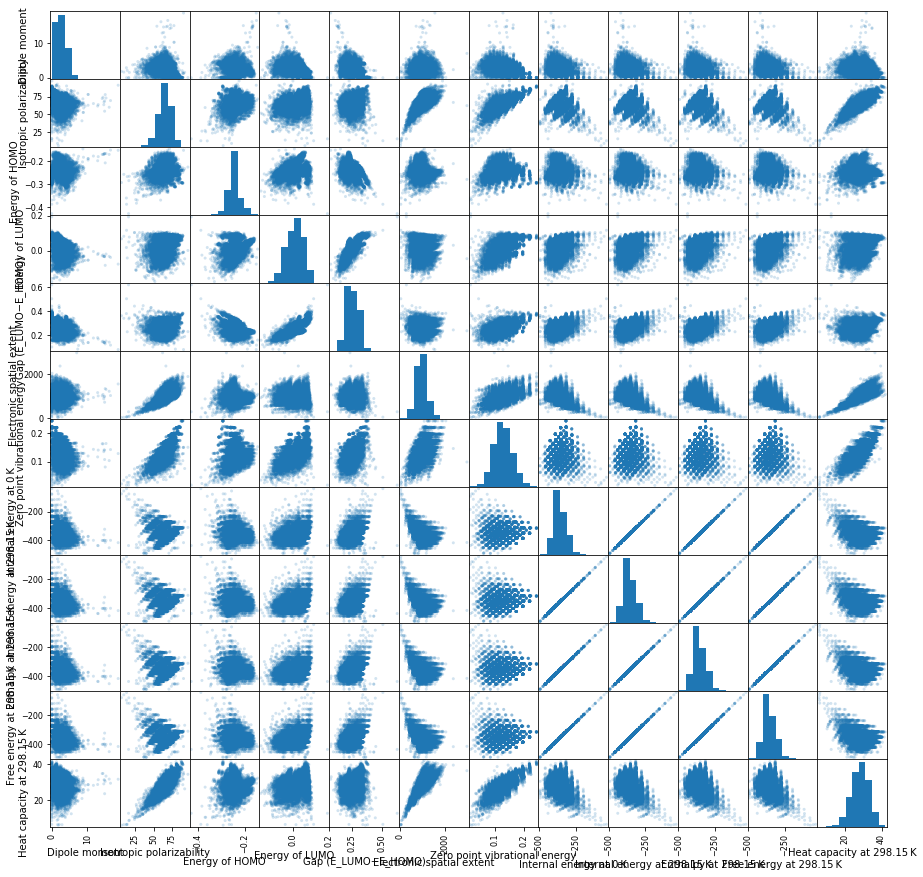

In [10]:
from pandas.plotting import scatter_matrix

scatter_matrix(df.drop(["Rotational constant A", "Rotational constant B", "Rotational constant C"], axis=1), figsize=(15, 15), alpha=0.2)

The above figure highlights which two columns are apparently dependent on each other. To quantify this, it might be helpful to check which columns correlate with each other. Again, pandas has a built-in function **corr()** that calculates the correlation between all columns, using for example [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). A value of *+1* means positive correlation, a value of _0_ no correlation, and a value of *-1* anticorrelation.

In [11]:
df.corr()

,Rotational constant A,Rotational constant B,Rotational constant C,Dipole moment,Isotropic polarizability,Energy of HOMO,Energy of LUMO,Gap (E_LUMO−E_HOMO),Electronic spatial extent,Zero point vibrational energy,Internal energy at 0 K,Internal energy at 298.15 K,Enthalpy at 298.15 K,Free energy at 298.15 K,Heat capacity at 298.15 K
Rotational constant A,1.000000,0.000339,0.000902,-0.016060,0.007255,-0.000687,-0.013579,-0.012879,-0.005715,-0.023288,0.027388,0.027388,0.027388,0.027389,-0.013032
Rotational constant B,0.000339,1.000000,0.986869,-0.029173,-0.201619,-0.029373,0.037836,0.052637,-0.193884,-0.108092,0.192350,0.192346,0.192346,0.192357,-0.187198
Rotational constant C,0.000902,0.986869,1.000000,-0.038328,-0.210185,-0.046851,0.055504,0.079232,-0.201379,-0.102602,0.215893,0.215890,0.215890,0.215900,-0.193444
Dipole moment,-0.016060,-0.029173,-0.038328,1.000000,-0.176071,-0.097005,-0.360009,-0.299263,0.029435,-0.314677,-0.265425,-0.265429,-0.265429,-0.265421,-0.121896
Isotropic polarizability,0.007255,-0.201619,-0.210185,-0.176071,1.000000,0.188320,0.248019,0.141106,0.702700,0.754509,-0.123924,-0.123904,-0.123904,-0.123950,0.806621
Energy of HOMO,-0.000687,-0.029373,-0.046851,-0.097005,0.188320,1.000000,0.228144,-0.312878,-0.062561,0.086106,-0.052177,-0.052180,-0.052180,-0.052171,0.013843
Energy of LUMO,-0.013579,0.037836,0.055504,-0.360009,0.248019,0.228144,1.000000,0.853363,-0.014550,0.603664,0.333482,0.333490,0.333490,0.333476,0.264474
Gap (E_LUMO−E_HOMO),-0.012879,0.052637,0.079232,-0.299263,0.141106,-0.312878,0.853363,1.000000,0.019293,0.542774,0.353272,0.353281,0.353281,0.353263,0.250575
Electronic spatial extent,-0.005715,-0.193884,-0.201379,0.029435,0.702700,-0.062561,-0.014550,0.019293,1.000000,0.504283,-0.424805,-0.424784,-0.424784,-0.424839,0.788676
Zero point vibrational energy,-0.023288,-0.108092,-0.102602,-0.314677,0.754509,0.086106,0.603664,0.542774,0.504283,1.000000,0.056647,0.056668,0.056668,0.056622,0.790626


To visually display the correlation coefficients, following code can be used in which each entry of the above matrix is color coded. Yellow stands for *+1* and dark blue for _-1_

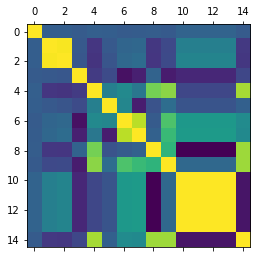

In [12]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

With the graphs above we can decide what dependencies are worthwhile investigating further. We can try to fit regression models to different graphs to extract quantitative models. 